In [6]:
import numpy as np 
import pandas as pd 

In [7]:
train=pd.read_csv('datasets/train.csv')

In [8]:
train.shape

(162758, 5)

In [9]:
movies=pd.read_csv('datasets/movies.csv')

In [10]:
movies.shape

(143258, 14)

In [11]:
movies=movies.drop_duplicates()

In [12]:
movies.shape

(141687, 14)

In [13]:
merge=pd.merge(train,movies)

In [14]:
merge.shape

(309986, 18)

# Exploratory Data Analysis

In [15]:
merge.dtypes

movieid                  object
reviewerName             object
isFrequentReviewer         bool
reviewText               object
sentiment                object
title                    object
audienceScore           float64
rating                   object
ratingContents           object
releaseDateTheaters      object
releaseDateStreaming     object
runtimeMinutes          float64
genre                    object
originalLanguage         object
director                 object
boxOffice                object
distributor              object
soundType                object
dtype: object

audienceScore and runtimeMinutes are numerical features.

In [16]:
merge.isna().sum()

movieid                      0
reviewerName                 0
isFrequentReviewer           0
reviewText               13220
sentiment                    0
title                        0
audienceScore            91916
rating                  179798
ratingContents          179798
releaseDateTheaters     133147
releaseDateStreaming     66816
runtimeMinutes           14473
genre                     9141
originalLanguage         12227
director                     0
boxOffice               169547
distributor             145553
soundType               203772
dtype: int64

merge dataset contains 1219408 null values

Text(0.5, 0, 'audienceScore')

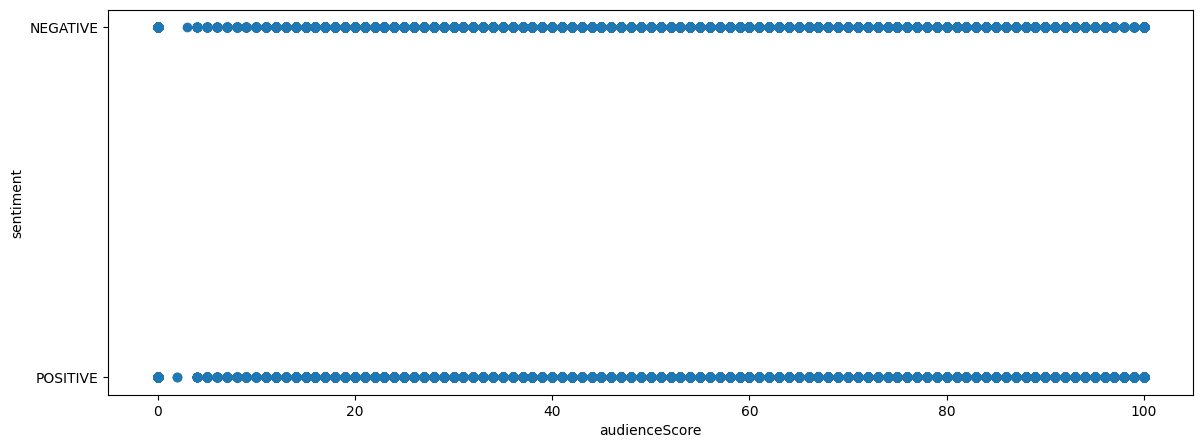

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.scatter(merge['audienceScore'],merge['sentiment'])
plt.ylabel('sentiment')
plt.xlabel('audienceScore')

Above scatter plot concludes that sentiment does not depend upon audienceScore.

Text(0.5, 0, 'runtimeMinutes')

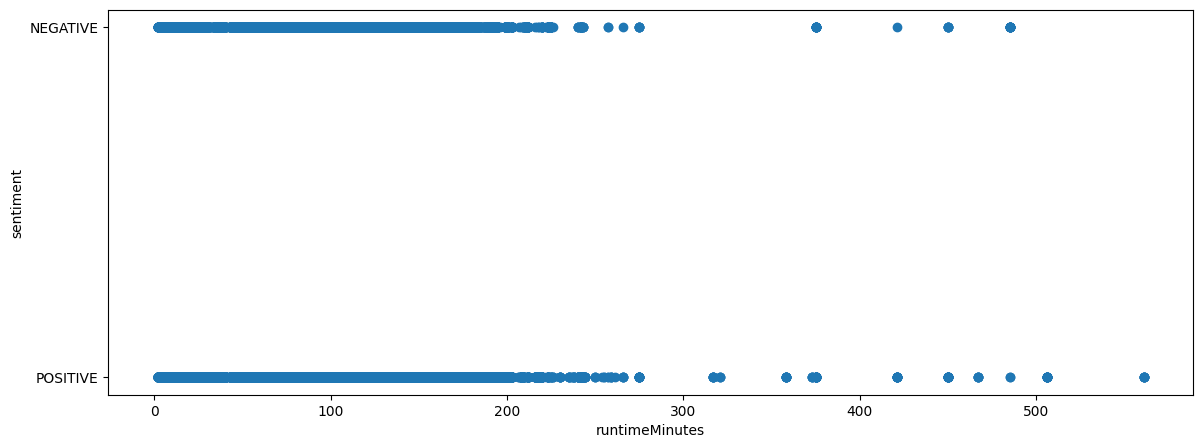

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.scatter(merge['runtimeMinutes'],merge['sentiment'])
plt.ylabel('sentiment')
plt.xlabel('runtimeMinutes')

Above scatter plot concludes that sentiment does not depend upon audienceScore.

<Axes: xlabel='sentiment', ylabel='Count'>

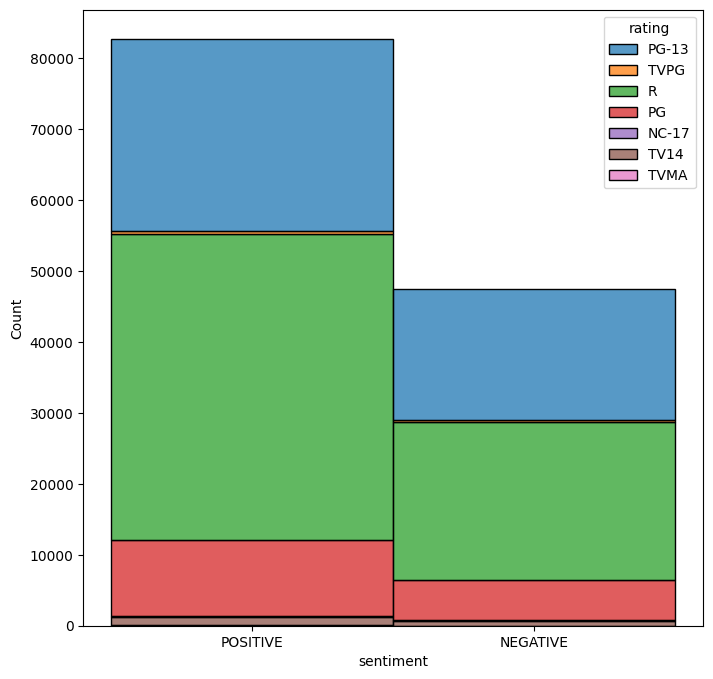

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.histplot(x="sentiment", hue="rating", data=merge, stat="count", multiple="stack")

Number of positive sentiment is more than negative sentiment

<Axes: xlabel='rating', ylabel='Count'>

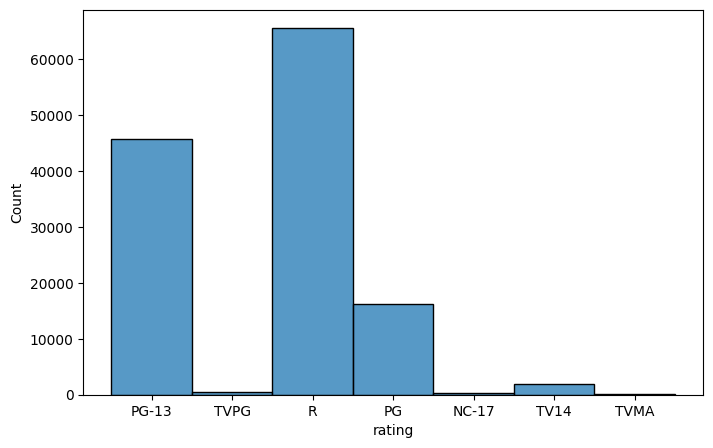

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(x="rating",data=merge, stat="count")

Rating distribution

array([[<Axes: title={'center': 'review_len'}>,
        <Axes: title={'center': 'word_count'}>]], dtype=object)

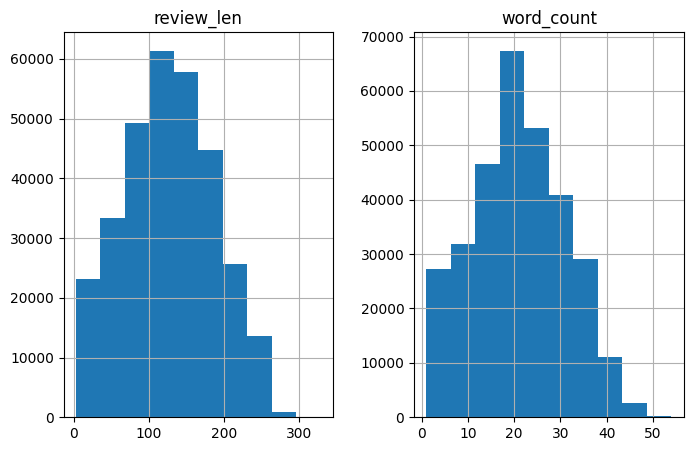

In [21]:
merge['review_len'] = merge['reviewText'].astype(str).apply(len)
merge['word_count'] = merge['reviewText'].apply(lambda x: len(str(x).split()))
merge[["review_len", "word_count"]].hist(figsize=(8,5))

In [22]:
merge=merge[['reviewText','rating','genre','sentiment']]
print(merge.head())

                                          reviewText rating  \
0  Henry Selick’s first movie since 2009’s Corali...  PG-13   
1  &#91;T&#93;he haphazard way this story is asse...  PG-13   
2  The stop-motion artistry of Wendell &amp; Wild...  PG-13   
3  Wendell &amp; Wild is narratively overstuffed ...  PG-13   
4  For being about the Netherworlds&#44; it&#8217...  PG-13   

                                   genre sentiment  
0  Comedy, Animation, Adventure, Fantasy  POSITIVE  
1  Comedy, Animation, Adventure, Fantasy  NEGATIVE  
2  Comedy, Animation, Adventure, Fantasy  POSITIVE  
3  Comedy, Animation, Adventure, Fantasy  NEGATIVE  
4  Comedy, Animation, Adventure, Fantasy  POSITIVE  


In [23]:
merge['rating'].unique()

array(['PG-13', nan, 'TVPG', 'R', 'PG', 'NC-17', 'TV14', 'TVMA'],
      dtype=object)

rating feature has 7 unique values.

In [24]:
merge["reviewText"]=merge["reviewText"].str.replace('[^A-Za-z0-9]+',' ',regex=True)
merge["reviewText"]=merge["reviewText"].fillna("Null")
merge["genre"]=merge["genre"].str.replace('[^A-Za-z0-9]+',' ',regex=True)
merge["genre"]=merge["genre"].fillna("Null")

This is used to replace special characters except space from reviewText and genre feature, and replace null values with string "Null" in both the columns.

In [25]:
merge.head()

,reviewText,rating,genre,sentiment
0,Henry Selick s first movie since 2009 s Corali...,PG-13,Comedy Animation Adventure Fantasy,POSITIVE
1,91 T 93 he haphazard way this story is assemb...,PG-13,Comedy Animation Adventure Fantasy,NEGATIVE
2,The stop motion artistry of Wendell amp Wild i...,PG-13,Comedy Animation Adventure Fantasy,POSITIVE
3,Wendell amp Wild is narratively overstuffed pa...,PG-13,Comedy Animation Adventure Fantasy,NEGATIVE
4,For being about the Netherworlds 44 it 8217 s ...,PG-13,Comedy Animation Adventure Fantasy,POSITIVE


In [26]:
X=merge[['reviewText','rating','genre']]
y=merge[['sentiment']]

# Preprocessing

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy ='constant',fill_value='Null')

This is used to remove null value from the columns.

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse = False,handle_unknown='ignore')

This is used to encode values in rating feature.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words="english",analyzer="word",ngram_range=(1,1),binary=True)

This is used for reviewText and genre feature.

In [30]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

rating_pipe = Pipeline([
    ('imputer',imputer),
    ('encoder',encoder)]
)
features=make_column_transformer((count_vect,'reviewText'),(count_vect,'genre'),(rating_pipe,['rating']))

1. rating_pipe is used to replace null values and encode values of rating feature.
2. make_column_transformer is used to apply count_vectorizer and rating_pipe on 'reviewText' 'genre' and 'rating' simultaneously.

In [31]:
X=features.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Splitting dataset into train and validation

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8,shuffle=True)

# DummyClassifier

In [34]:
from sklearn.dummy import DummyClassifier
clf_dummy = DummyClassifier(random_state=42) 
clf_dummy.fit(X_train, y_train)

DummyClassifier(random_state=42)

In [35]:
y_pred=clf_dummy.predict(X_valid)

In [36]:
from sklearn.metrics import f1_score
f1_score(y_valid,y_pred,pos_label='POSITIVE')

0.7991632609579887

1. Dummy Classifier gave 0.7998373920786713 as f1 score for validation data.

# Logistic Regression

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
SelectKBest=SelectKBest(score_func=chi2, k=3000)

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
model1 = Pipeline([('reducer', SelectKBest),('clf',log_reg)])
#model1=log_reg
model1.fit(X_train,y_train.values.ravel())

Pipeline(steps=[('reducer',
                 SelectKBest(k=3000,
                             score_func=<function chi2 at 0x13746e320>)),
                ('clf', LogisticRegression(max_iter=1000))])

In [75]:
y_pred1=model1.predict(X_train)
y_pred=model1.predict(X_valid)

In [76]:
from sklearn.metrics import f1_score
print("train score:",f1_score(y_train.values.ravel(),y_pred1,pos_label='POSITIVE'))
print("validation_score:",f1_score(y_valid,y_pred,pos_label='POSITIVE'))

train score: 0.8755228375439182
validation_score: 0.8717871913918043


1. Logistic Rregression with solver='lbfgs', max_iter=1000 gave 0.8712081936427839 as f1 score for validation data after using SelectKBest
2. Logistic Rregression with solver='lbfgs', max_iter=1000 gave 0.900728275471965 as f1 score for validation data before using SelectKBest

# RandomForestClassifier

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
SelectKBest=SelectKBest(score_func=chi2, k=4000)

In [42]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=5)
model2 = Pipeline([('reducer', SelectKBest),('clf',RFC)])
model2=RFC

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
RFC=RandomForestClassifier()
grid = {'n_estimators': [200, 400,600],
        "max_depth": [10,20,30],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[1,2,4],
        'bootstrap': [True, False]}
randomCV = RandomizedSearchCV(estimator = RFC, param_distributions = grid,random_state=42,cv=3,n_jobs=-1,verbose=1)
model2=randomCV

used above code for hyperparameter tuning with RandomForestClassifier in google colab and got following as best parameters-
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}

In [44]:
RFC = RandomForestClassifier(n_estimators= 400, min_samples_split= 2, min_samples_leaf=1, max_depth=30, bootstrap=True)
model2=RFC

In [45]:
model2.fit(X_train,y_train.values.ravel())

In [66]:
y_pred1RFC=model2.predict(X_train)
y_predRFC=model2.predict(X_valid)

In [68]:
from sklearn.metrics import f1_score
print("train score:",f1_score(y_train.values.ravel(),y_pred1RFC,pos_label='POSITIVE'))
print("validation score:",f1_score(y_valid,y_predRFC,pos_label='POSITIVE'))

train score: 0.7996427132433968
validation score: 0.8004267908239973


1. RandomForestClassifier with n_estimators=200, random_state=0,max_depth=5 as parameters gave 0.7980243993466365 as f1 score for validation data using SelectKBest
2. RandomForestClassifier with n_estimators=200, random_state=0,max_depth=5 as parameters gave 0.7984815560416771 as f1 score for validation data without using SelectKBest
3. RandomForestClassifier with n_estimators= 400, min_samples_split= 2, min_samples_leaf=1, max_depth=30, bootstrap=True as parameters from hyperparameter tuning gave 0.8003165647865372 as f1 score for validation data without using SelectKBest

# KNN

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
SelectKBest=SelectKBest(score_func=chi2, k=3000)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
model3 = Pipeline([('reducer', SelectKBest),('clf',knn)])
model3.fit(X_train,y_train.values.ravel())

In [69]:
y_pred1KNN= model3.predict(X_train)
y_predKNN= model3.predict(X_valid)

In [70]:
from sklearn.metrics import f1_score
print("train score:",f1_score(y_train.values.ravel(),y_pred1KNN,pos_label='POSITIVE'))
print("validation score:",f1_score(y_valid,y_predKNN,pos_label='POSITIVE'))

train score: 0.9121933857156104
validation score: 0.8281383355972545


1.KNN with n_neighbors=3,n_jobs=-1 gave 0.9109808791559045 as f1 score for validation data using SelectKBest

# Decision Tree

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
SelectKBest=SelectKBest(score_func=chi2, k=3000)

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state = 0,max_depth=10)
model4 = Pipeline([('reducer', SelectKBest),('clf',dtree)])
model4.fit(X_train,y_train)

In [73]:
y_pred1DT= model4.predict(X_train)
y_predDT= model4.predict(X_valid)

In [74]:
from sklearn.metrics import f1_score
print("train score:",f1_score(y_train.values.ravel(),y_pred1DT,pos_label='POSITIVE'))
print("validation score:",f1_score(y_valid,y_predDT,pos_label='POSITIVE'))

train score: 0.8045767921537889
validation score: 0.8043210666771706


1. DecisionTreeClassifier with random_state = 0,max_depth=10 gave 0.8039518248103213 as f1 score for validation data using SelectKBest
2. DecisionTreeClassifier with random_state = 0,max_depth=10 gave 0.8051255356574556 as f1 score for validation data without using SelectKBest

In [54]:
test=pd.read_csv('datasets/test.csv')

In [55]:
test.shape

(55315, 4)

In [56]:
movies=movies.drop_duplicates(subset=['movieid'],keep='first')

In [57]:
type(movies)

pandas.core.frame.DataFrame

In [58]:
merge_test=pd.merge(test,movies,how='left',on="movieid")

In [59]:
merge_test.shape

(55315, 17)

In [60]:
merge_test["reviewText"]=merge_test["reviewText"].str.replace('[^A-Za-z0-9]+',' ',regex=True)
merge_test["reviewText"]=merge_test["reviewText"].fillna("Null")
merge_test["genre"]=merge_test["genre"].str.replace('[^A-Za-z0-9]+',' ',regex=True)
merge_test["genre"]=merge_test["genre"].fillna("Null")

In [61]:
merge_test.head()

,movieid,reviewerName,isTopCritic,reviewText,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,Holiday Horror Mystery thriller,English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce s direction is elegant and unforc...,Terminator Katniss Everdeen Glimmer,86.0,PG,['Emotional Thematic Material'],2002-11-29,2003-04-15,94.0,Drama Adventure,English,Cindy Flander,$6.2M,Miramax Films,"Dolby SR, DTS, Dolby Stereo, Surround, SDDS, D..."
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn t do to say what path Maria ultimate...,James Bond Labyrinth Gollum,62.0,NaN,NaN,NaN,NaN,NaN,Drama,French,Charlotte Bramble,NaN,NaN,NaN
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...,V Quest Han Solo Wondrous,84.0,NaN,NaN,2021-07-16,2021-08-03,92.0,Drama Mystery thriller,English,Jean Gainer,$3.1M,Neon,NaN
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no budget musical of sorts abou...,Enigma Hulk Surreal Starlight,NaN,NaN,NaN,NaN,NaN,66.0,Drama Musical,Arabic,Marvin Short,NaN,NaN,NaN


In [62]:
X_test=merge_test[['reviewText','rating','genre']]

In [78]:
X_test=features.transform(X_test)

In [64]:
type(X_test)

pandas.core.frame.DataFrame

In [80]:
prediction=model1.predict(X_test)

In [81]:
submission=pd.DataFrame(columns=['id','sentiment'])
submission['id']=[i for i in range(len(prediction))]
submission['sentiment']=prediction
submission.to_csv('submission.csv',index=False)

In [82]:
submission.shape

(55315, 2)

In [83]:
submission.head()

,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE


In [84]:
import pickle
with open('model_and_preprocessing.pkl', 'wb') as f:
    pickle.dump({
        'model': model1,
        'features':features
    }, f)

Out of all the models used KNN gave the best train score but Logistic Regression gave best validation score.